# CEDAS-NORBIS PhD Summer School

Here we look at the London Borough related data to explore how we can use interactive visualisations to explore and compare multiple "spaces" generated by embedding algorithms popular in the machine learning literature and practice.

In [5]:
import pandas as pd

df = pd.read_csv('london-borough-profiles.csv')

In [7]:
df.head()

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8000,4514.371383,290.4,27.525868,41.303887,7.948036,77.541617,...,.,8.10,8.23,7.44,x,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,195600,73261.408580,3610.8,54.160527,33.228935,26.072939,63.835021,...,35.4,7.06,7.57,6.97,3.3,Lab,0.000000,100.000000,0.000000,38.16
2,E09000003,Barnet,Outer London,370000,141385.794900,8674.8,42.651374,36.896246,20.886408,65.505593,...,14.7,7.35,7.79,7.27,2.63,Cons,50.793651,42.857143,1.587302,41.1
3,E09000004,Bexley,Outer London,236500,94701.226400,6058.1,39.044243,38.883039,20.282830,63.146450,...,25.8,7.47,7.75,7.21,3.22,Cons,71.428571,23.809524,0.000000,not avail
4,E09000005,Brent,Outer London,320200,114318.553900,4323.3,74.063670,35.262694,20.462585,68.714872,...,19.6,7.23,7.32,7.09,3.33,Lab,9.523810,88.888889,1.587302,33


Lots of different features. We also have really odd NaN values such as x and not available. We can try and get rid of this.

In [8]:
def isnumber(x):
    try:
        float(x)
        return True
    except:
        if (len(x) > 1) & ("not avail" not in x):
            return True
        else:
            return False

# apply isnumber function to every element
df = df[df.applymap(isnumber)]
df.head()

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8000,4514.371383,290.4,27.525868,41.303887,7.948036,77.541617,...,NaN,8.10,8.23,7.44,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,195600,73261.408580,3610.8,54.160527,33.228935,26.072939,63.835021,...,35.4,7.06,7.57,6.97,3.3,Lab,0.000000,100.000000,0.000000,38.16
2,E09000003,Barnet,Outer London,370000,141385.794900,8674.8,42.651374,36.896246,20.886408,65.505593,...,14.7,7.35,7.79,7.27,2.63,Cons,50.793651,42.857143,1.587302,41.1
3,E09000004,Bexley,Outer London,236500,94701.226400,6058.1,39.044243,38.883039,20.282830,63.146450,...,25.8,7.47,7.75,7.21,3.22,Cons,71.428571,23.809524,0.000000,NaN
4,E09000005,Brent,Outer London,320200,114318.553900,4323.3,74.063670,35.262694,20.462585,68.714872,...,19.6,7.23,7.32,7.09,3.33,Lab,9.523810,88.888889,1.587302,33


That looks much cleaner.

Replace the NaN values in numeric columns with the mean.

In [11]:
# get only numeric columns
numericColumns = df._get_numeric_data()

In [12]:
from sklearn.metrics import euclidean_distances

# keep place names and store them in a variable
placeNames = df["Area/INDICATOR"]

# let's fill the missing values with mean()
numericColumns = numericColumns.fillna(numericColumns.mean())

# let's centralize the data
numericColumns -= numericColumns.mean()

# now we compute the euclidean distances between the columns by passing the same data twice
# the resulting data matrix now has the pairwise distances between the boroughs.
# CAUTION: note that we are now building a distance matrix in a high-dimensional data space
# remember the Curse of Dimensionality -- we need to be cautious with the distance values
distMatrix = euclidean_distances(numericColumns, numericColumns)

Check to make sure everything looks ok.

In [13]:
numericColumns.head()

,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013","Proportion of population aged 65 and over, 2013",% of population from BAME groups (2013),% people aged 3+ whose main language is not English (2011 census),...,"Average Public Transport Accessibility score, 2012",Indices of Multiple Deprivation 2010 Rank of Average Score,Income Support claimant rate (Feb-14),Rates of Children Looked After (2013),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election
0,-247760.606061,-97761.616805,-4473.681818,-43.279630,5.426932,-11.500067,8.480871,3.019196,-17.390874,-4.491385,...,3.753658,157.424242,-1.726749,42.212121,0.816364,0.651212,0.23303,0.000000,0.000000,-8.881784e-16
1,-60160.606061,-29014.579608,-1153.281818,-16.644971,-2.648021,6.624837,-5.225725,-1.399112,5.764246,-2.905288,...,-0.882730,-82.575758,1.787041,20.212121,-0.223636,-0.008788,-0.23697,-32.854444,43.384181,-6.598065e+00
2,114239.393939,39109.806712,3910.718182,-28.154125,1.019290,1.438305,-3.555153,2.116847,-2.799300,1.775548,...,-0.883020,71.424242,-0.517827,-18.787879,0.066364,0.211212,0.06303,17.939207,-13.758676,-5.010764e+00
3,-19260.606061,-7574.761788,1294.018182,-31.761255,3.006083,0.834727,-5.914296,5.079569,-20.328016,-15.598200,...,-1.364540,69.424242,-0.018377,-8.787879,0.186364,0.171212,0.00303,38.574127,-32.806295,-6.598065e+00
4,64439.393939,12042.565712,-440.781818,3.258171,-0.614262,1.014482,-0.345874,-0.668608,25.000030,15.521631,...,-0.174795,-69.575758,0.001370,-6.787879,-0.053636,-0.258788,-0.11697,-23.330634,32.273070,-5.010764e+00


We can plot out our many dimension space. This will take quite a while.

In [ ]:
import seaborn as sns
sns_plot = sns.pairplot(numericColumns)
sns_plot.savefig("output.png")

Dimension reduction will help us here!

We could apply various different types of dimension reduction here. We are specifically going to capture the dissimilarity in the data using [multidimensional scaling](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling). Our distance matrix will come in useful here.

In [8]:
from sklearn import manifold
# for instance, typing distMatrix.shape on the console gives:
# Out[115]: (38, 38) # i.e., the number of rows

# first we generate an MDS object and extract the projections
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
Y = mds.fit_transform(distMatrix)

To interpret what is happening, let us plot the boroughs on the projected two dimensional space.

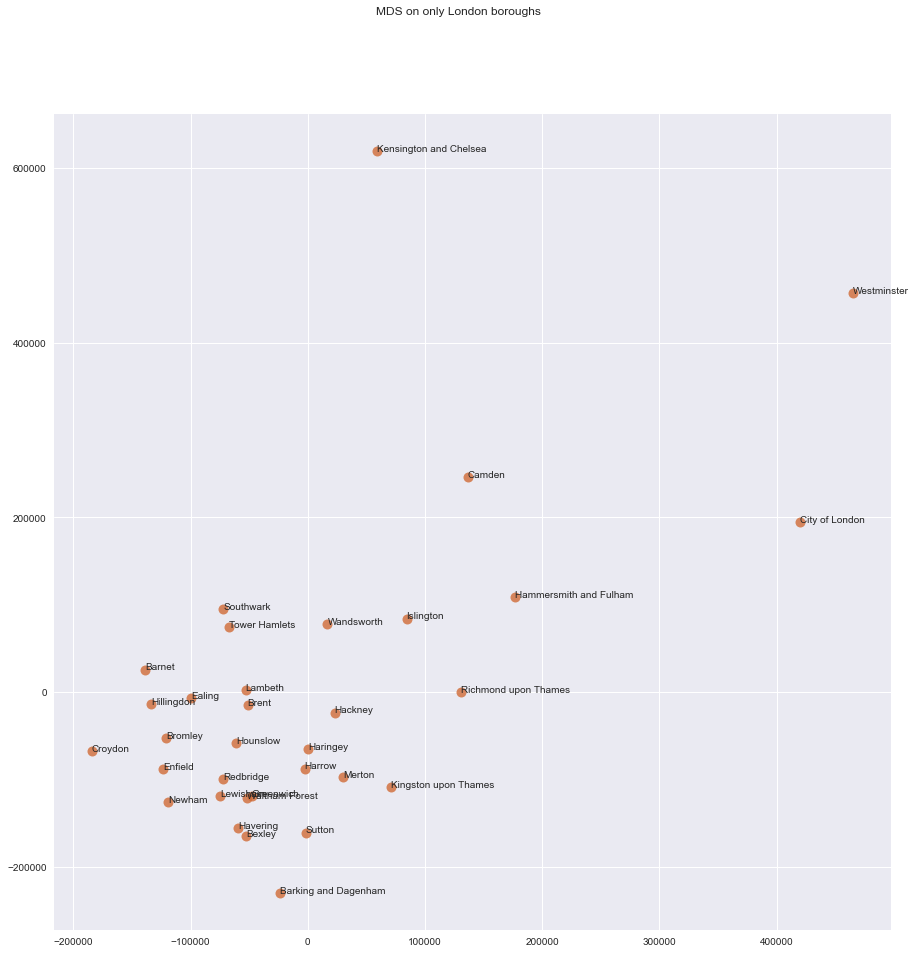

In [9]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
plt.suptitle('MDS on only London boroughs')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth=0)

for i, txt in enumerate(placeNames):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

Our data also include happiness metrics. Pulling these out of our data and carrying out more multidimensional scaling can help us see how the boroughs differ in happiness.

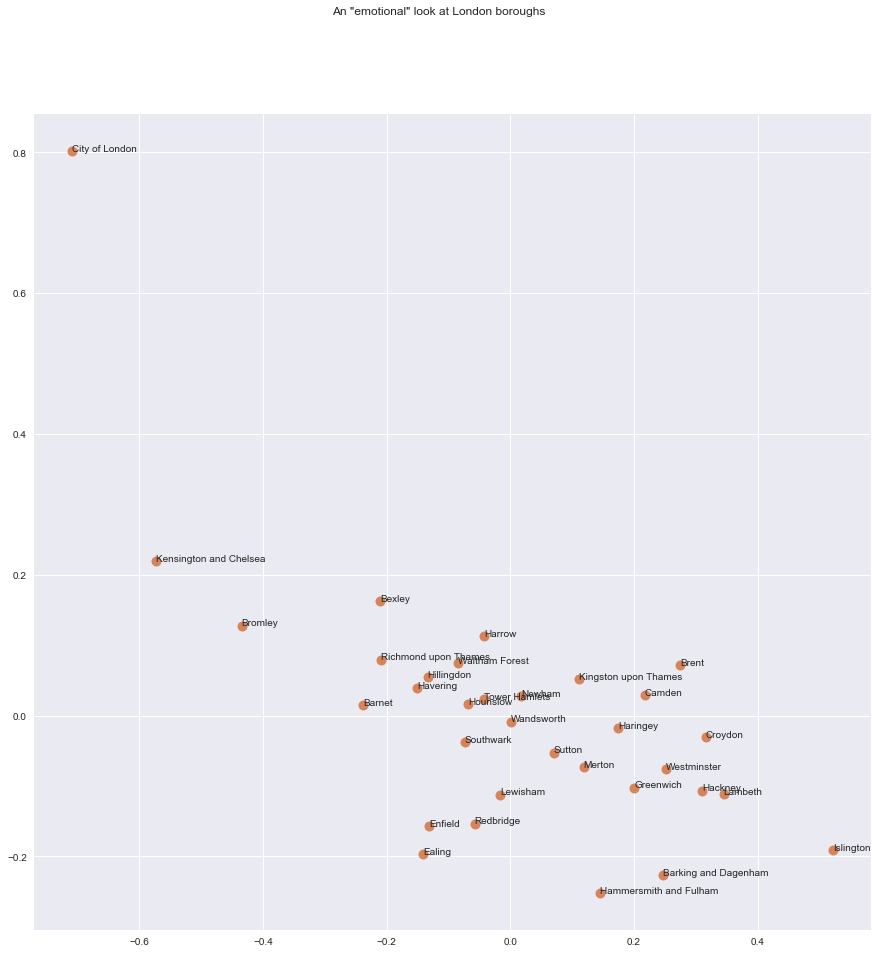

In [10]:
# get the data columns relating to emotions and feelings
dataOnEmotions = numericColumns[["Life satisfaction score 2012-13 (out of 10)", "Worthwhileness score 2012-13 (out of 10)","Happiness score 2012-13 (out of 10)"]]

# a new distance matrix to represent "emotional distance"s
distMatrix2 = euclidean_distances(dataOnEmotions, dataOnEmotions)

# compute a new "embedding" (machine learners' word for projection)
Y2 = mds.fit_transform(distMatrix2)

# let's look at the results
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
plt.suptitle('An \"emotional\" look at London boroughs')
ax.scatter(Y2[:, 0], Y2[:, 1], c="#D06B36", s = 100, alpha = 0.8, linewidth=0)

for i, txt in enumerate(placeNames):
    ax.annotate(txt, (Y2[:, 0][i],Y2[:, 1][i]))

The location of the different boroughs on the 2 dimensional multidimensional scaling space from the happiness metrics is

In [11]:
results_fixed = Y2.copy()
print(results_fixed)

[[-0.70892532  0.80124083]
 [ 0.24668624 -0.22691854]
 [-0.23781457  0.01487534]
 [-0.21049999  0.16311126]
 [ 0.27416486  0.07194072]
 [-0.43488532  0.12785745]
 [ 0.21724408  0.029433  ]
 [ 0.31612995 -0.03078397]
 [-0.14148302 -0.19694309]
 [-0.13170305 -0.15714635]
 [ 0.20031597 -0.10234282]
 [ 0.31002109 -0.10658478]
 [ 0.14523973 -0.25155499]
 [ 0.17432436 -0.01791382]
 [-0.04289414  0.11257026]
 [-0.15070285  0.03898429]
 [-0.1337481   0.05493496]
 [-0.06882379  0.01585228]
 [ 0.52176842 -0.19135998]
 [-0.57360832  0.21984763]
 [ 0.11035397  0.05149169]
 [ 0.34472392 -0.11187618]
 [-0.01688736 -0.1121789 ]
 [ 0.11841243 -0.0729631 ]
 [ 0.01729659  0.02724252]
 [-0.05796286 -0.15339549]
 [-0.2091363   0.07969988]
 [-0.07356415 -0.03737575]
 [ 0.07045799 -0.05257236]
 [-0.04321943  0.02350374]
 [-0.08445777  0.07428246]
 [ 0.00105941 -0.00853438]
 [ 0.25211734 -0.07642381]]


We may want to look at if the general happiness rating captures the position of the boroughs. To do this we need to assign colours based on the binned happiness score.

In [12]:
import numpy as np
colorMappingValuesHappiness = np.asarray(dataOnEmotions[["Life satisfaction score 2012-13 (out of 10)"]]).flatten()
print(results_fixed.shape)
colorMappingValuesHappiness.shape
colorMappingValuesHappiness
#c = colorMappingValuesCrime, cmap = plt.cm.Greens

(33, 2)


array([ 0.81636364, -0.22363636,  0.06636364,  0.18636364, -0.05363636,
        0.34636364, -0.06363636, -0.28363636, -0.04363636, -0.10363636,
       -0.12363636, -0.21363636, -0.05363636, -0.08363636,  0.05636364,
        0.11636364,  0.06636364,  0.01636364, -0.20363636,  0.39636364,
        0.00636364, -0.19363636, -0.05363636, -0.10363636, -0.06363636,
       -0.00363636,  0.13636364, -0.01363636, -0.03363636, -0.00363636,
       -0.04363636, -0.05363636, -0.19363636])

Finally, we can plot this. What can you see?

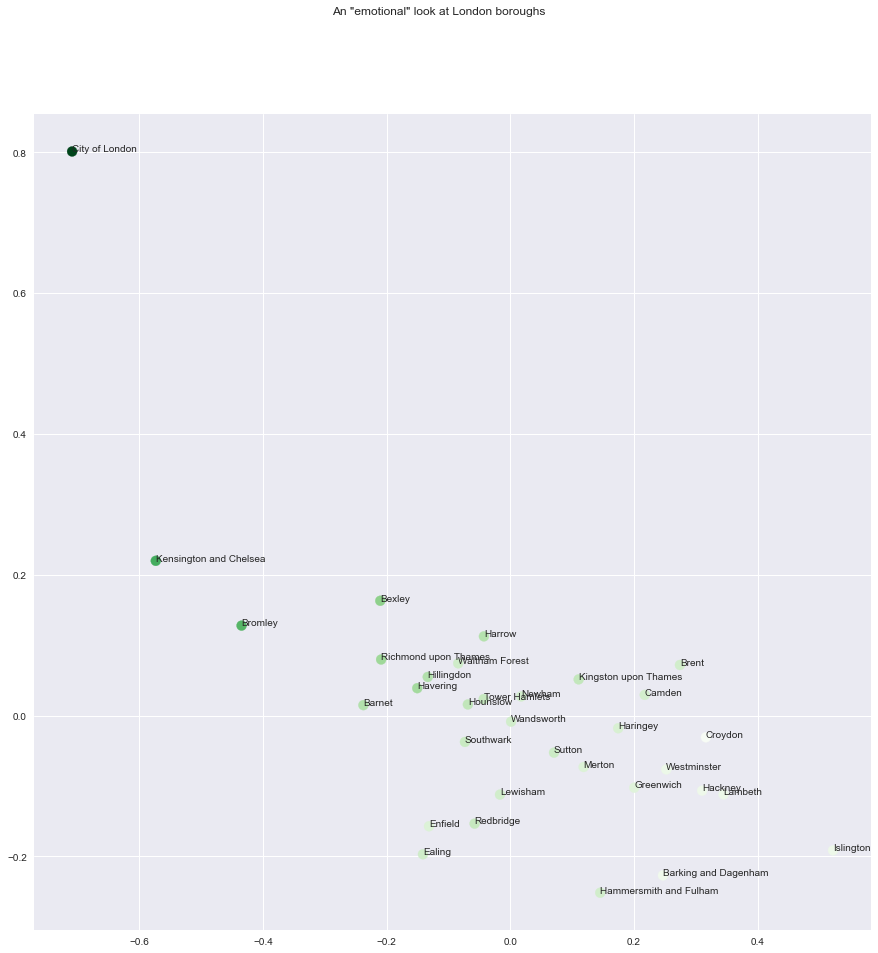

In [13]:
# let's look at the results
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
plt.suptitle('An \"emotional\" look at London boroughs')
#ax.scatter(results_fixed[:, 0], results_fixed[:, 1], c = colorMappingValuesHappiness, cmap='viridis')
plt.scatter(results_fixed[:, 0], results_fixed[:, 1], c = colorMappingValuesHappiness, s = 100, cmap=plt.cm.Greens)

for i, txt in enumerate(placeNames):
    ax.annotate(txt, (results_fixed[:, 0][i],results_fixed[:, 1][i]))

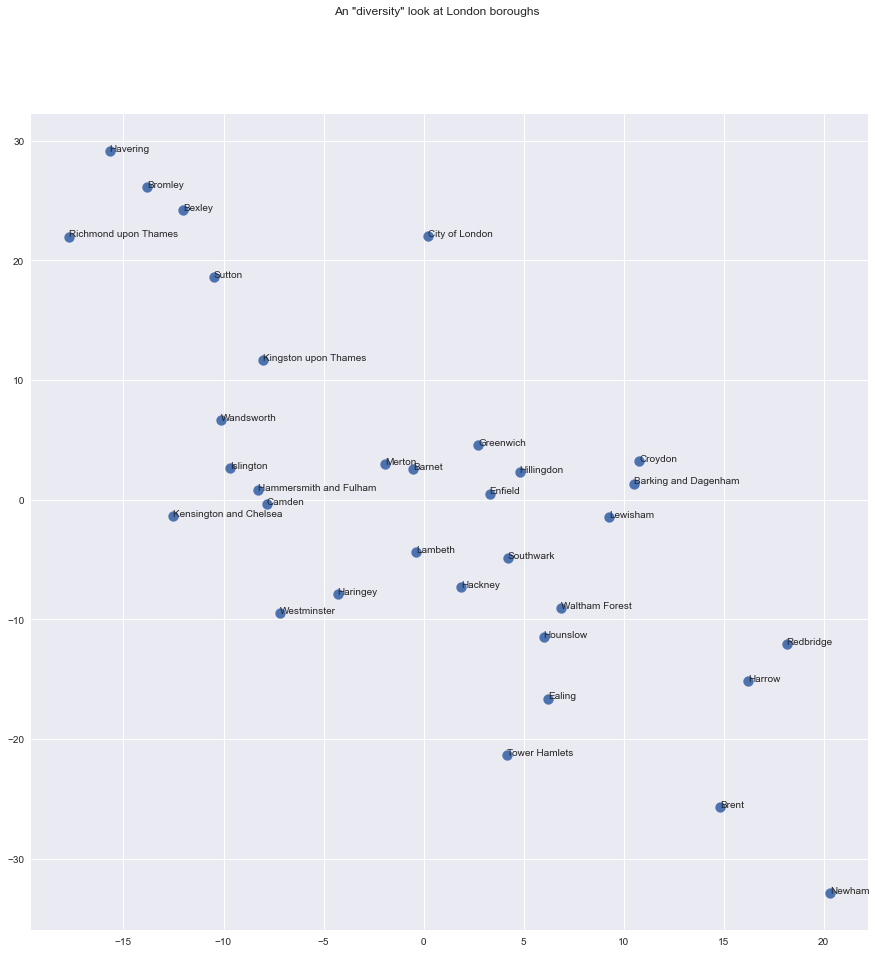

In [14]:
# get the data columns relating to emotions and feelings
dataOnDiversity = numericColumns[["Proportion of population aged 0-15, 2013", "Proportion of population of working-age, 2013", "Proportion of population aged 65 and over, 2013", "% of population from BAME groups (2013)", "% people aged 3+ whose main language is not English (2011 census)"]]

# a new distance matrix to represent "emotional distance"s
distMatrix3 = euclidean_distances(dataOnDiversity, dataOnDiversity)

mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
Y = mds.fit_transform(distMatrix3)

plt.style.use('seaborn')

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
plt.suptitle('An \"diversity\" look at London boroughs')
ax.scatter(Y[:, 0], Y[:, 1], s = 100, cmap=plt.cm.Greens)

for i, txt in enumerate(placeNames):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

This looks very different to the one above on "emotion" related variables. Or job now is to relate these two projections to one another. Do you see similarities? Do you see clusters of boroughs? Can you reflect on how you can relate and combine these two maps conceptually?

### A small TODO for you:

Q: Can you think of other maps that you can produce with this data? Have a look at the variables once again and try to produce new "perspectives" to the data and see what they have to say.